In [1]:
#Import required package

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
#Import Data

consumption1 = pd.read_excel('/Users/diegofinkelstein/Desktop/Fall 2021/Data Programming/Project 2/Consumption.xls', skiprows=range(6), sheet_name='Sheet0')
consumption2 = pd.read_excel('/Users/diegofinkelstein/Desktop/Fall 2021/Data Programming/Project 2/Consumption.xls', skiprows=range(6), sheet_name='Sheet1')

inventory1 = pd.read_excel('/Users/diegofinkelstein/Desktop/Fall 2021/Data Programming/Project 2/Inventories.xls',skiprows=range(6), sheet_name='Sheet0')
inventory2 = pd.read_excel('/Users/diegofinkelstein/Desktop/Fall 2021/Data Programming/Project 2/Inventories.xls',skiprows=range(6), sheet_name='Sheet1')


In [3]:
#Clean the data

#Choose only related rows and columns
consumption1 = consumption1.iloc[0:407,1:257]
consumption2 = consumption2.iloc[0:407,1:257]

#Merge two table to get the full data in one table
consumption = pd.merge(consumption1, consumption2, how='inner', on='Unnamed: 1')

#Reset the index of table 
consumption.set_index('Unnamed: 1', inplace=True)

#Review data
consumption

,JAN1997,FEB1997,MAR1997,APR1997,MAY1997,JUN1997,JUL1997,AUG1997,SEP1997,OCT1997,...,DEC2020,JAN2021,FEB2021,MAR2021,APR2021,MAY2021,JUN2021,JUL2021,AUG2021,SEP2021
Unnamed: 1,,,,,,,,,,,,,,,,,,,,,
Personal consumption expenditures,5411132,5433958,5454224,5459332,5460234,5494236,5548827,5587042,5601667,5637666,...,14389504,14857874,14699583,15458874,15618699,15624413,15801984,15811726,15966792,16060225
Goods,1975398,1985085,1999342,1976046,1963243,1983635,2006838,2030343,2023191,2028587,...,4785349,5165383,5015399,5554292,5575989,5475264,5538116,5425852,5513384,5543234
Durable goods,703285,701986,711501,697484,690225,702052,715724,732611,720003,724657,...,1719867,1912648,1836888,2123984,2150271,2065680,2060506,1980386,1988012,1984775
Motor vehicles and parts,293646,286152,293246,280612,276654,281178,291415,307890,291342,296317,...,600646,640745,619935,764036,803784,743726,726654,680629,649141,637018
New motor vehicles (55),157840,154530,159568,149667,156094,149564,162828,173324,163427,166276,...,335372,357519,348368,412643,432126,394198,381545,346120,310070,296088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Market-based PCE household maintenance,35648,35932,36339,36642,36968,37347,37699,38091,38506,38892,...,91509,94144,94278,96120,97025,97171,96684,97174,98400,98464
Market-based PCE food and energy,751969,753109,745688,749958,737266,735096,744762,743954,751732,762555,...,1645779,1721487,1725384,1813633,1804128,1808652,1851161,1842580,1897698,1909534
Market-based PCE excluding food,4373110,4388719,4407049,4408980,4408396,4440171,4485707,4518592,4530176,4559428,...,11247252,11645957,11527088,12189326,12325222,12342908,12487465,12474148,12580748,12643927


In [4]:
#Clean the data

#Choose only related rows and columns
inventory1 = inventory1.iloc[0:60,1:257]
inventory2 = inventory2.iloc[0:60,1:45]

#Merge two table to get the full data in one table
inventory = pd.merge(inventory1, inventory2, how='inner', on='Unnamed: 1')

#Reset the index of table 
inventory.set_index('Unnamed: 1', inplace=True)

#Review data
inventory

,JAN1997,FEB1997,MAR1997,APR1997,MAY1997,JUN1997,JUL1997,AUG1997,SEP1997,OCT1997,...,NOV2020,DEC2020,JAN2021,FEB2021,MAR2021,APR2021,MAY2021,JUN2021,JUL2021,AUG2021
Unnamed: 1,,,,,,,,,,,,,,,,,,,,,
Manufacturing and trade industries,994175.0,996927.0,996878.0,1001258.0,1005030.0,1008339.0,1008849.0,1010588.0,1015966.0,1020990.0,...,2279928.0,2306358.0,2343631.0,2377449.0,2404751.0,2434133.0,2480642.0,2515122.0,2524073.0,2534467.0
Manufacturing industries,421299.0,421046.0,421044.0,421275.0,423471.0,423889.0,423899.0,425693.0,426335.0,429162.0,...,881202.0,898225.0,922011.0,942080.0,963248.0,981233.0,1008031.0,1028588.0,1037729.0,1042733.0
Durable goods manufacturing industries,261353.0,261560.0,261382.0,261512.0,262820.0,262723.0,263509.0,264139.0,264117.0,265920.0,...,521434.0,528476.0,539046.0,544466.0,556771.0,568737.0,581990.0,589613.0,595474.0,596897.0
Wood product manufacturing,8399.0,8532.0,8541.0,8609.0,8600.0,8633.0,8713.0,8919.0,9048.0,9164.0,...,17495.0,18468.0,19509.0,20397.0,21086.0,22499.0,23892.0,24460.0,20419.0,18437.0
Nonmetallic mineral product manufacturing,9130.0,9152.0,9114.0,9134.0,9144.0,9199.0,9161.0,9147.0,9141.0,9179.0,...,19152.0,19312.0,19139.0,19314.0,19489.0,19492.0,19649.0,19871.0,19923.0,19856.0
Primary metal manufacturing,20722.0,21002.0,21416.0,21257.0,21365.0,21471.0,21424.0,21596.0,21562.0,21707.0,...,40821.0,42652.0,44182.0,45672.0,47614.0,49775.0,51884.0,53524.0,55125.0,55520.0
Fabricated metal product manufacturing,29643.0,29639.0,29956.0,29799.0,30084.0,30311.0,30282.0,30356.0,30411.0,30502.0,...,71509.0,73311.0,75541.0,78643.0,82641.0,86581.0,89534.0,92482.0,94493.0,95455.0
Machinery manufacturing,35318.0,35011.0,34967.0,35153.0,35649.0,35725.0,35491.0,35607.0,35618.0,35927.0,...,71224.0,72882.0,73870.0,75761.0,77898.0,79886.0,81595.0,83098.0,84527.0,84605.0
Computer and electronic product manufacturing,55835.0,55368.0,55002.0,55236.0,55217.0,55017.0,56159.0,56099.0,56038.0,56234.0,...,69745.0,70091.0,69582.0,69939.0,70681.0,70977.0,71537.0,72272.0,73303.0,75233.0


In [5]:
#Feature 1: Compare the supply and consumption on Electical Goods (including appliances, computers, and other electrical entertainment products)

#create the table for electrical supply
electrical_supply = inventory.loc[['        Computer and electronic product manufacturing',
                                    '        Electrical equipment, appliance, and component manufacturing',
                                    '        Electrical goods wholesalers'],:]
#Find the total for electrical supply
electrical_supply.loc['Total'] = electrical_supply.sum(axis = 0)

#create the table for electrical consumption
electrical_consumption = consumption.loc[['            Household appliances (part of 33)',
                                         '            Video, audio, photographic, and information processing equipment and media (75, 76, and part of 93)'],:]

#Find the total for electrical consumption
electrical_consumption.loc['Total'] = electrical_consumption.sum(axis = 0)

#Calculate feature 1
electrical_supply_total = electrical_supply.loc['Total']
electrical_consumption_total = electrical_consumption.loc['Total']

feature1 = electrical_supply_total - electrical_consumption_total
feature1 = pd.DataFrame(feature1).rename(columns = {'Total' : 'Electrical'})

feature1

,Electrical
APR1997,-32681.0
APR1998,-39560.0
APR1999,-55889.0
APR2000,-66492.0
APR2001,-54236.0
...,...
SEP2017,-137566.0
SEP2018,-152136.0
SEP2019,-174682.0
SEP2020,-230130.0


Text(0.5, 1.0, 'Feature 1 - Electrical Products')

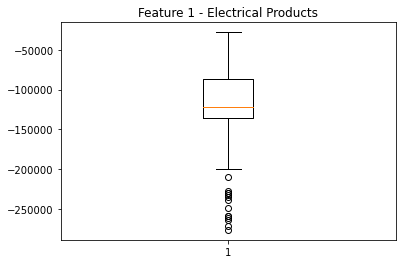

In [6]:
plt.boxplot(feature1)
plt.title('Feature 1 - Electrical Products')

In [7]:
#Feature 2: Compare the supply and consumption on Furniture and furnishing

#create the table for furniture supply
furniture_supply = inventory.loc[['        Furniture and related product manufacturing',
                                  '        Furniture and home furnishings wholesalers',
                                  '    Furniture, furnishings, electronics, and appliance stores'],:]

#Find the total for furniture supply
furniture_supply.loc['Total'] = furniture_supply.sum(axis = 0)

#create the table for furniture consumption
furniture_consumption = consumption.loc[['            Furniture and furnishings (parts of 31 and 32)'],:]

#Find the total for furniture consumption
furniture_consumption.loc['Total'] = furniture_consumption.sum(axis = 0)

#Calculate feature 2
furniture_supply_total = furniture_supply.loc['Total']
furniture_consumption_total = furniture_consumption.loc['Total']

feature2 = furniture_supply_total - furniture_consumption_total
feature2 = pd.DataFrame(feature2).rename(columns = {'Total' : 'Furniture'})

feature2

,Furniture
APR1997,-56633.0
APR1998,-64715.0
APR1999,-73739.0
APR2000,-85383.0
APR2001,-85810.0
...,...
SEP2017,-151578.0
SEP2018,-170381.0
SEP2019,-182884.0
SEP2020,-221530.0


Text(0.5, 1.0, 'Feature 2 - Furnniture')

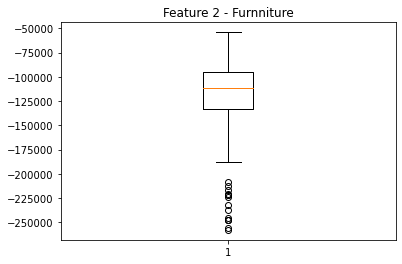

In [8]:
plt.boxplot(feature2)
plt.title('Feature 2 - Furnniture')

In [9]:
#Feature 3: Compare the supply and consumption on Food

#create the table for food supply
food_supply = inventory.loc[['        Food manufacturing',
                            '        Grocery and related products wholesalers',
                            '        Farm product raw material wholesalers',
                            '    Food and beverage stores'],:]

#Find the total for food supply
food_supply.loc['Total'] = food_supply.sum(axis = 0)

#create the table for food consumption
food_consumption = consumption.loc[['                Food purchased for off-premises consumption'],:]

#Find the total for food consumption
food_consumption.loc['Total'] = food_consumption.sum(axis = 0)

#Calculate feature 3
food_supply_total = food_supply.loc['Total']
food_consumption_total = food_consumption.loc['Total']

feature3 = food_supply_total - food_consumption_total
feature3 = pd.DataFrame(feature3).rename(columns = {'Total' : 'Food'})

feature3

,Food
APR1997,-267674.0
APR1998,-273201.0
APR1999,-291777.0
APR2000,-304279.0
APR2001,-321482.0
...,...
SEP2017,-556358.0
SEP2018,-563469.0
SEP2019,-577012.0
SEP2020,-655355.0


Text(0.5, 1.0, 'Feature 3 - Food')

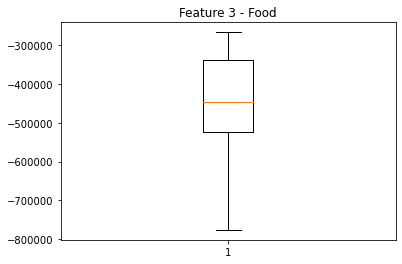

In [10]:
plt.boxplot(feature3)
plt.title('Feature 3 - Food')

In [11]:
#Feature 4: Compare the supply and consumption on Beverage

#create the table for beverage supply
beverage_supply = inventory.loc[['        Beverage and tobacco product manufacturing'],:]

#Find the total for beverage supply
beverage_supply.loc['Total'] = beverage_supply.sum(axis = 0)

#create the table for beverage consumption
beverage_consumption = consumption.loc[['                Nonalcoholic beverages purchased for off-premises consumption',
                                       '            Alcoholic beverages purchased for off-premises consumption (5)'],:]

#Find the total for beverage consumption
beverage_consumption.loc['Total'] = beverage_consumption.sum(axis = 0)

#Calculate feature 4
beverage_supply_total = beverage_supply.loc['Total']
beverage_consumption_total = beverage_consumption.loc['Total']

feature4 = beverage_supply_total - beverage_consumption_total
feature4 = pd.DataFrame(feature4).rename(columns = {'Total' : 'Beverage'})

feature4

,Beverage
APR1997,-102916.0
APR1998,-106030.0
APR1999,-114132.0
APR2000,-121653.0
APR2001,-128792.0
...,...
SEP2017,-205674.0
SEP2018,-212387.0
SEP2019,-219480.0
SEP2020,-252617.0


Text(0.5, 1.0, 'Feature 4 - Beverage')

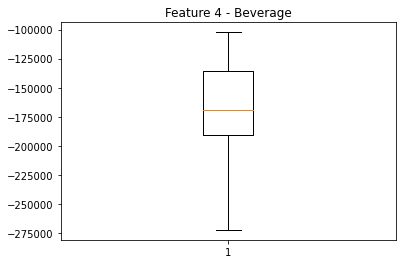

In [12]:
plt.boxplot(feature4)
plt.title('Feature 4 - Beverage')

In [13]:
#Feature 5: Compare the supply and consumption on Apparel

#create the table for apparel supply
apparel_supply = inventory.loc[['        Apparel manufacturing',
                               '        Apparel, piece goods, and notions wholesalers',
                               '    Clothing and clothing accessories stores'],:]

#Find the total for apparel supply
apparel_supply.loc['Total'] = apparel_supply.sum(axis = 0)

#create the table for apparel consumption
apparel_consumption = consumption.loc[['        Clothing and footwear'],:]

#Find the total for apparel consumption
apparel_consumption.loc['Total'] = apparel_consumption.sum(axis = 0)

#Calculate feature 5
apparel_supply_total = apparel_supply.loc['Total']
apparel_consumption_total = apparel_consumption.loc['Total']

feature5 = apparel_supply_total - apparel_consumption_total
feature5 = pd.DataFrame(feature5).rename(columns = {'Total' : 'Apparel'})

feature5

,Apparel
APR1997,-195179.0
APR1998,-208381.0
APR1999,-218576.0
APR2000,-226463.0
APR2001,-226626.0
...,...
SEP2017,-301610.0
SEP2018,-310825.0
SEP2019,-312256.0
SEP2020,-341869.0


Text(0.5, 1.0, 'Feature 5 - Apparel')

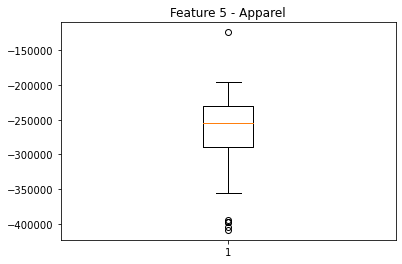

In [14]:
plt.boxplot(feature5)
plt.title('Feature 5 - Apparel')

In [15]:
#Create Target column

Target = inventory.loc['            Manufacturing and trade industries'] - consumption.loc['Goods']

Predictive_Target = pd.DataFrame(Target)

Predictive_Target['Target'] = pd.DataFrame(Target)

<AxesSubplot:title={'center':'Target'}, ylabel='Frequency'>

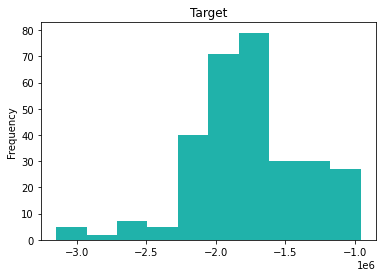

In [16]:
Target.plot(kind='hist', title='Target', color='lightseagreen')

In [17]:
##Create ABT table
feature12 = pd.merge(feature1, feature2, how='inner', left_index=True,  right_index=True)
feature123 = pd.merge(feature12, feature3, how='inner', left_index=True,  right_index=True)
feature1234 = pd.merge(feature123, feature4, how='inner', left_index=True,  right_index=True)
feature12345 = pd.merge(feature1234, feature5, how='inner', left_index=True,  right_index=True)

ABT = pd.merge(feature12345, Predictive_Target['Target'], how='inner', left_index=True,  right_index=True)


In [18]:
#We can see that the dtype of our index is object. thus, it is not sorted by date order
#We need to change the data type of index to date

ABT['Time'] = pd.to_datetime(ABT.index)
ABT.set_index('Time',  inplace=True)
ABT.sort_index(inplace=True)

ABT

,Electrical,Furniture,Food,Beverage,Apparel,Target
Time,,,,,,
1997-01-01,-28069.0,-54122.0,-269014.0,-102305.0,-196295.0,-981223.0
1997-02-01,-31511.0,-56196.0,-268991.0,-103215.0,-196834.0,-988158.0
1997-03-01,-32046.0,-56372.0,-268670.0,-104679.0,-197450.0,-1002464.0
1997-04-01,-32681.0,-56633.0,-267674.0,-102916.0,-195179.0,-974788.0
1997-05-01,-31743.0,-56883.0,-266064.0,-102477.0,-195891.0,-958213.0
...,...,...,...,...,...,...
2021-05-01,-261655.0,-247897.0,-665050.0,-265275.0,-397601.0,-2994622.0
2021-06-01,-263936.0,-245551.0,-679773.0,-269450.0,-408738.0,-3022994.0
2021-07-01,-248726.0,-237242.0,-677376.0,-262734.0,-396766.0,-2901779.0


In [19]:
ABT.dropna(inplace=True)

<AxesSubplot:title={'center':'Time series of all features and Target '}, xlabel='Time', ylabel='Difference between Inventory and Consumption'>

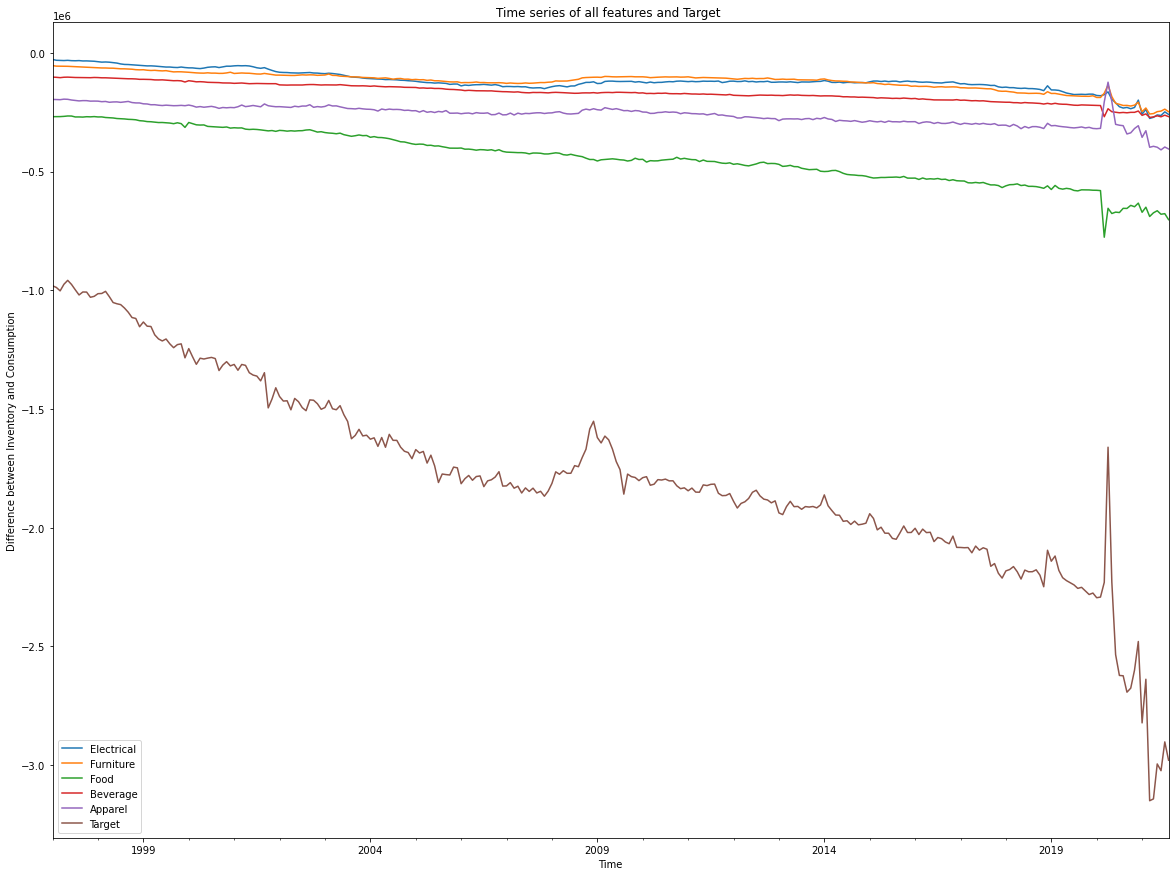

In [20]:
ABT.plot(figsize=(20,15), title='Time series of all features and Target ',
         ylabel='Difference between Inventory and Consumption')

We could see there is a trend for our target over the years. Using the historical data, we will calulate the decreasing trend of 'Target'. If the difference between inventory and consumption is lower the predicted trend, we indicate that consumers need to shopping ahead. 

In [21]:
#Calculate the trend of 'Target' by fit the data in a linear equation of the form y=ax+b

y = ABT.Target
N = len(y)
x = range(N)
A = (sum(x[i] * y[i] for i in x) - 1./N*sum(x)*sum(y)) / (sum(x[i]**2 for i in x) - 1./N*sum(x)**2)
B = 1.*sum(y)/N - A * 1.*sum(x)/N
print( " Trended Target = %f + %f * x" % (B, A))

 Trended Target = -1115080.024911 + -4470.129904 * x


In [22]:
#Create a list of Trended Target
x = []
for i in range(0,296):
    a = A*i + B
    x.append(a)
    i = i+1
    
x

[-1115080.024911275,
 -1119550.1548156785,
 -1124020.284720082,
 -1128490.414624486,
 -1132960.5445288895,
 -1137430.674433293,
 -1141900.8043376966,
 -1146370.9342421002,
 -1150841.064146504,
 -1155311.1940509076,
 -1159781.3239553112,
 -1164251.4538597148,
 -1168721.5837641186,
 -1173191.7136685222,
 -1177661.8435729258,
 -1182131.9734773294,
 -1186602.103381733,
 -1191072.2332861368,
 -1195542.3631905403,
 -1200012.493094944,
 -1204482.6229993475,
 -1208952.752903751,
 -1213422.882808155,
 -1217893.0127125585,
 -1222363.142616962,
 -1226833.2725213657,
 -1231303.4024257693,
 -1235773.532330173,
 -1240243.6622345767,
 -1244713.7921389802,
 -1249183.9220433838,
 -1253654.0519477874,
 -1258124.1818521912,
 -1262594.3117565948,
 -1267064.4416609984,
 -1271534.571565402,
 -1276004.7014698058,
 -1280474.8313742094,
 -1284944.961278613,
 -1289415.0911830165,
 -1293885.2210874204,
 -1298355.350991824,
 -1302825.4808962275,
 -1307295.610800631,
 -1311765.7407050347,
 -1316235.8706094385,
 -1

In [23]:
#Attach Trended Target to our dataframe
ABT['Trended'] = x

In [24]:
#Create new column Buy_or_not which takes value 0 and 1. If the Target < Trended Target, Buy_or_not is 1 and vice vera.

y =[]
for i in range(len(ABT.index)):
    if ABT.Target[i] - ABT.Trended[i] < 0:
        y.append(1)
    else:
        y.append(0)
        
ABT['Buy_or_not'] = y
ABT

,Electrical,Furniture,Food,Beverage,Apparel,Target,Trended,Buy_or_not
Time,,,,,,,,
1997-01-01,-28069.0,-54122.0,-269014.0,-102305.0,-196295.0,-981223.0,-1.115080e+06,0
1997-02-01,-31511.0,-56196.0,-268991.0,-103215.0,-196834.0,-988158.0,-1.119550e+06,0
1997-03-01,-32046.0,-56372.0,-268670.0,-104679.0,-197450.0,-1002464.0,-1.124020e+06,0
1997-04-01,-32681.0,-56633.0,-267674.0,-102916.0,-195179.0,-974788.0,-1.128490e+06,0
1997-05-01,-31743.0,-56883.0,-266064.0,-102477.0,-195891.0,-958213.0,-1.132961e+06,0
...,...,...,...,...,...,...,...,...
2021-04-01,-271694.0,-255990.0,-673860.0,-269927.0,-393734.0,-3141856.0,-2.415888e+06,1
2021-05-01,-261655.0,-247897.0,-665050.0,-265275.0,-397601.0,-2994622.0,-2.420358e+06,1
2021-06-01,-263936.0,-245551.0,-679773.0,-269450.0,-408738.0,-3022994.0,-2.424828e+06,1


In [31]:
ABT['Buy_or_not'].value_counts()

0    190
1    106
Name: Buy_or_not, dtype: int64

In [32]:
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version
from sklearn.model_selection import train_test_split

In [33]:
if Version(sklearn_version) < '0.18':
    from sklearn.cross_validation import train_test_split
else:
    from sklearn.model_selection import train_test_split
    
num_vars = ['Electrical', 'Furniture', 'Food', 'Beverage', 'Apparel']
    
X = ABT[num_vars].values
y = ABT['Buy_or_not'].values
X, y 

#we use 80% of data to build the model and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [27]:
#Standardize the features
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

# Modeling using Logistics Regression

In [28]:
%load_ext watermark
%watermark -a 'Sebastian Raschka' -u -d -p numpy,pandas,matplotlib,sklearn

Author: Sebastian Raschka

Last updated: 2021-11-29

numpy     : 1.20.1
pandas    : 1.2.4
matplotlib: 3.3.4
sklearn   : 0.0



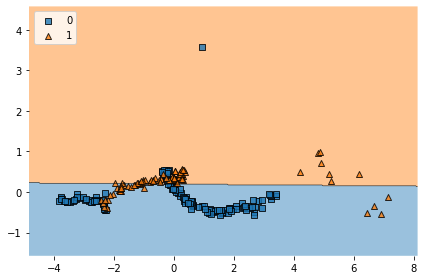

In [29]:
#Modeling using Logistics Regression Model

from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA

lr = LogisticRegression(C=1000.0, random_state=0)
pca = PCA(n_components = 2)
X_train_std2 = pca.fit_transform(X_train_std)

lr.fit(X_train_std2, y_train)

plot_decision_regions(X_train_std2, y_train,
                      clf=lr)

plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

In [30]:
X_test_std2 = pca.fit_transform(X_test_std)
ŷ_lr = lr.predict(X_test_std2)

In [31]:
score_train = lr.score(X_train_std2, y_train)
score_test = lr.score(X_test_std2, y_test)
print('Ratio of correctly classified samples for:\n\tTraining-set:\t%f\n\tTest-set:\t%f'%(score_train, score_test))

Ratio of correctly classified samples for:
	Training-set:	0.788136
	Test-set:	0.600000


In [32]:
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test, ŷ_lr)
cm_lr

array([[34,  5],
       [19,  2]])

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ŷ_lr))

              precision    recall  f1-score   support

           0       0.64      0.87      0.74        39
           1       0.29      0.10      0.14        21

    accuracy                           0.60        60
   macro avg       0.46      0.48      0.44        60
weighted avg       0.52      0.60      0.53        60



# Model evaluation with training and testing curves

In [34]:
from sklearn.model_selection import learning_curve
from sklearn.pipeline import Pipeline

In [35]:
pipe_lr = Pipeline([
            ('scl', StandardScaler()),
            ('clf', LogisticRegression(
                        penalty='l2', random_state=0))])
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr,
                                          X=X_train,
                                          y=y_train,
                                          train_sizes=np.linspace(0.1, 1.0, 10),
                                          cv=10,
                                          n_jobs=3)

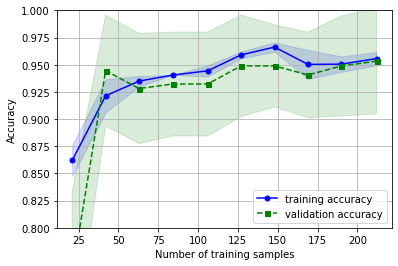

In [36]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5,
         label='training accuracy')
plt.fill_between(train_sizes,
                train_mean + train_std,
                train_mean - train_std,
                 alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean,
        color='green', linestyle='--',
        marker='s', markersize=5,
        label='validation accuracy')
plt.fill_between(train_sizes,
                test_mean + test_std,
                test_mean - test_std,
                alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
plt.show()

# Modeling using Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=5)

clf.fit(X_train_std, y_train)

DecisionTreeClassifier(max_depth=5)

In [38]:
score_train = clf.score(X_train_std, y_train)
score_test = clf.score(X_test_std, y_test)
print('Ratio of correctly classified samples for:\n\tTraining-set:\t%f\n\tTest-set:\t%f'%(score_train, score_test))

Ratio of correctly classified samples for:
	Training-set:	0.991525
	Test-set:	0.966667


In [39]:
ŷ_clf = clf.predict(X_test_std)

In [40]:
from sklearn.metrics import confusion_matrix
cm_clf = confusion_matrix(y_test, ŷ_clf)
cm_clf

array([[37,  2],
       [ 0, 21]])

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ŷ_clf))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        39
           1       0.91      1.00      0.95        21

    accuracy                           0.97        60
   macro avg       0.96      0.97      0.96        60
weighted avg       0.97      0.97      0.97        60



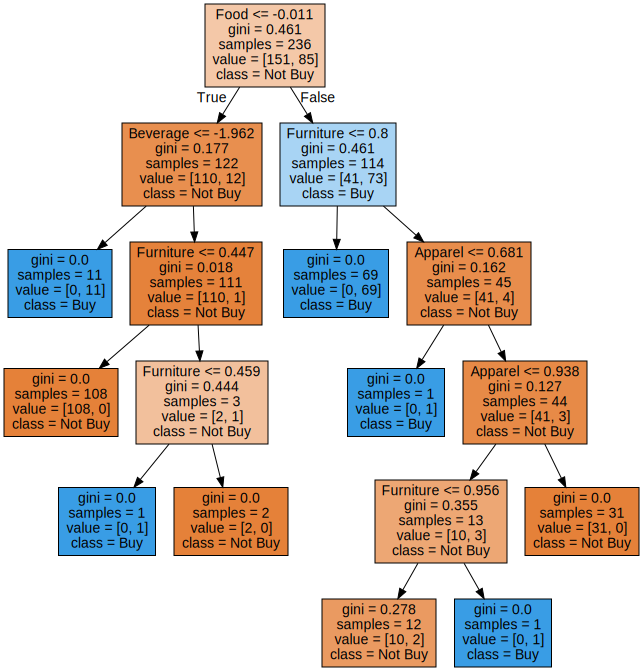

<Figure size 1800x1440 with 0 Axes>

In [42]:
import sklearn.tree
import pydot as pdot
import graphviz

fig = plt.figure(figsize=(25,20))

dot_data = sklearn.tree.export_graphviz(clf, out_file=None, 
                                feature_names= num_vars,  
                                class_names=['Not Buy','Buy'],
                                filled=True)
graph = graphviz.Source(dot_data) 
graph

# Model evaluation with training and testing curves

In [43]:
pipe_dtr = Pipeline([
            ('scl', StandardScaler()),
            ('clf', DecisionTreeClassifier(max_depth=5))])
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_dtr,
                                          X=X_train,
                                          y=y_train,
                                          train_sizes=np.linspace(0.1, 1.0, 10),
                                          cv=10,
                                          n_jobs=3)

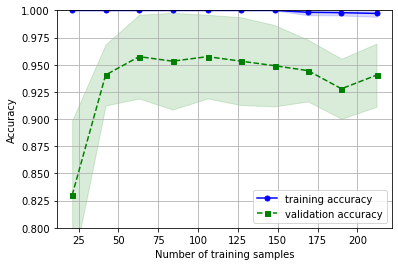

In [44]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5,
         label='training accuracy')
plt.fill_between(train_sizes,
                train_mean + train_std,
                train_mean - train_std,
                 alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean,
        color='green', linestyle='--',
        marker='s', markersize=5,
        label='validation accuracy')
plt.fill_between(train_sizes,
                test_mean + test_std,
                test_mean - test_std,
                alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
plt.show()